In [ ]:
#Q : What is the relationship between store trading duration and revenue?

In [10]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [20]:
#load the data
df = pd.read_csv('Data/data for Q5.csv')
df.head()

,BusinessEntityID,Name,AnnualSales,AnnualRevenue,BankName,BusinessType,YearOpened,Specialty,SquareFeet,Brands,Internet,NumberEmployees
0,292,Next-Door Bike Store,800000.0,80000.0,United Security,BM,1996,Mountain,21000,2,ISDN,13
1,294,Professional Sales and Service,800000.0,80000.0,International Bank,BM,1991,Touring,18000,4+,T1,14
2,296,Riders Company,800000.0,80000.0,Primary Bank & Reserve,BM,1999,Road,21000,2,DSL,15
3,298,The Bike Mechanics,800000.0,80000.0,International Security,BM,1994,Mountain,18000,2,DSL,16
4,300,Nationwide Supply,800000.0,80000.0,Guardian Bank,BM,1987,Touring,21000,4+,DSL,17


In [73]:
#EDA
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 580 to 405
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   BusinessEntityID          701 non-null    int64   
 1   Name                      701 non-null    object  
 2   AnnualSales               701 non-null    float64 
 3   AnnualRevenue             701 non-null    float64 
 4   BankName                  701 non-null    object  
 5   BusinessType              701 non-null    object  
 6   YearOpened                701 non-null    int64   
 7   Specialty                 701 non-null    object  
 8   SquareFeet                701 non-null    int64   
 9   Brands                    701 non-null    object  
 10  Internet                  701 non-null    object  
 11  NumberEmployees           701 non-null    int64   
 12  Duration_opened_in_years  701 non-null    int64   
 13  StoreSizeCategory         701 non-null    category
dt

,BusinessEntityID,AnnualSales,AnnualRevenue,YearOpened,SquareFeet,NumberEmployees,Duration_opened_in_years
count,701.000000,7.010000e+02,701.000000,701.000000,701.000000,701.000000,701.000000
mean,1035.878745,1.584736e+06,158473.609130,1986.288160,40014.265335,40.509272,38.711840
std,477.742331,9.809519e+05,98095.192556,9.131405,24445.620623,29.465796,9.131405
min,292.000000,3.000000e+05,30000.000000,1970.000000,6000.000000,2.000000,24.000000
25%,642.000000,8.000000e+05,80000.000000,1979.000000,20000.000000,16.000000,31.000000
50%,992.000000,1.500000e+06,150000.000000,1987.000000,37000.000000,35.000000,38.000000
75%,1342.000000,3.000000e+06,300000.000000,1994.000000,72000.000000,64.000000,46.000000
max,2051.000000,3.000000e+06,300000.000000,2001.000000,80000.000000,100.000000,55.000000


In [74]:
df.notnull().sum()

BusinessEntityID            701
Name                        701
AnnualSales                 701
AnnualRevenue               701
BankName                    701
BusinessType                701
YearOpened                  701
Specialty                   701
SquareFeet                  701
Brands                      701
Internet                    701
NumberEmployees             701
Duration_opened_in_years    701
StoreSizeCategory           701
dtype: int64

In [21]:
#create new columns 'Duration opened in years' when we know only YearOpened
current_year = datetime.now().year
df['Duration_opened_in_years'] = current_year - df['YearOpened']
df

,BusinessEntityID,Name,AnnualSales,AnnualRevenue,BankName,BusinessType,YearOpened,Specialty,SquareFeet,Brands,Internet,NumberEmployees,Duration_opened_in_years
0,292,Next-Door Bike Store,800000.0,80000.0,United Security,BM,1996,Mountain,21000,2,ISDN,13,29
1,294,Professional Sales and Service,800000.0,80000.0,International Bank,BM,1991,Touring,18000,4+,T1,14,34
2,296,Riders Company,800000.0,80000.0,Primary Bank & Reserve,BM,1999,Road,21000,2,DSL,15,26
3,298,The Bike Mechanics,800000.0,80000.0,International Security,BM,1994,Mountain,18000,2,DSL,16,31
4,300,Nationwide Supply,800000.0,80000.0,Guardian Bank,BM,1987,Touring,21000,4+,DSL,17,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1988,Retreat Inn,300000.0,30000.0,Primary Bank & Reserve,BM,1982,Road,7000,4+,T2,8,43
697,1990,Technical Parts Manufacturing,300000.0,30000.0,International Security,BM,1976,Touring,7000,4+,T1,5,49
698,1992,Totes & Baskets Company,300000.0,30000.0,Guardian Bank,BM,1970,Road,6000,4+,DSL,2,55
699,1994,World of Bikes,800000.0,80000.0,Primary Bank & Reserve,BM,1997,Mountain,19000,4+,T1,17,28


In [22]:
df = df.sort_values(by='Duration_opened_in_years')

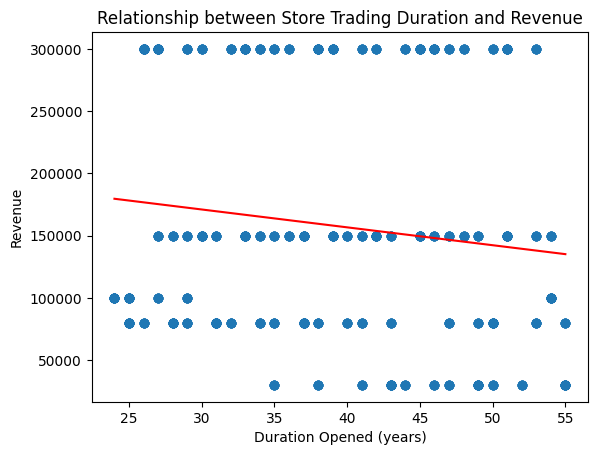

In [72]:
#plot relationship between store trading duration and revenue
plt.scatter(df['Duration_opened_in_years'], df['AnnualRevenue'])
plt.xlabel('Duration Opened (years)')
plt.ylabel('Revenue')
trendline = np.polyfit(df['Duration_opened_in_years'], df['AnnualRevenue'], 1)
plt.plot(df['Duration_opened_in_years'], np.polyval(trendline, df['Duration_opened_in_years']), color='red', linestyle='-', label='Trendline')
plt.title('Relationship between Store Trading Duration and Revenue')
plt.show()

    

In [26]:
#calculate correlation between Duration opened and AnnualRevenue
correlation = df['Duration_opened_in_years'].corr(df['AnnualRevenue'])
print(f'Correlation between Duration Opened and Revenue: {correlation}')



Correlation between Duration Opened and Revenue: -0.13364477783000062


The correlation is very small, which indicates that there is **no meaningful relationship** between store trading duration and revenue.


['Touring' 'Mountain' 'Road']


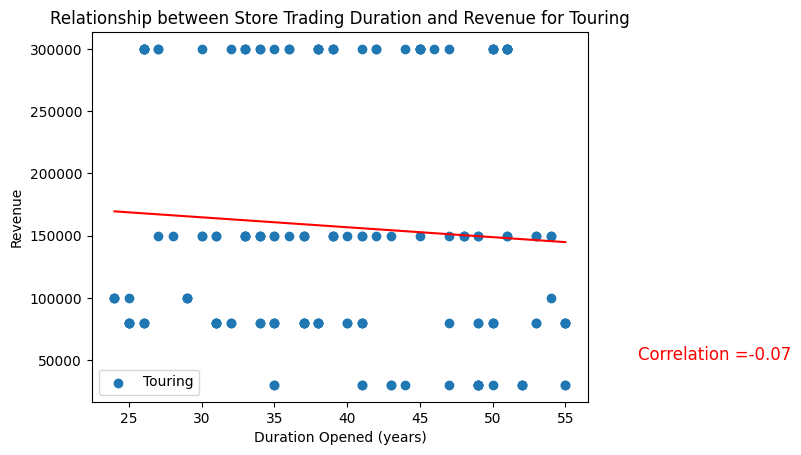

Correlation between Duration Opened and Revenue for Touring: -0.07282372654302283


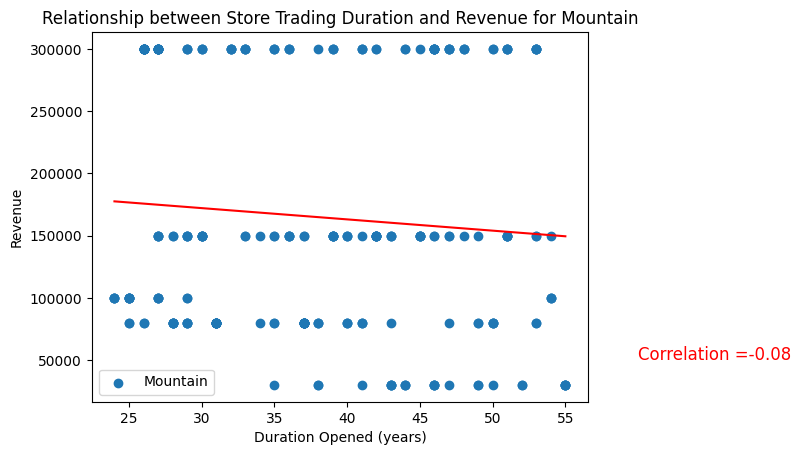

Correlation between Duration Opened and Revenue for Mountain: -0.08339929342215292


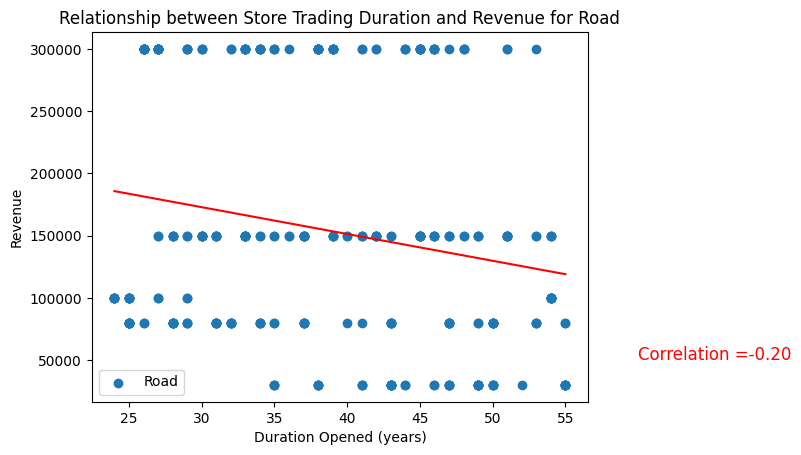

Correlation between Duration Opened and Revenue for Road: -0.2035263919822312


In [62]:
#try to group by Duration_opened_in_years by Specialty and plot result for each Specialty
specialties = df['Specialty'].unique()
print(specialties)
for specialty in specialties:
    specialty_data = df[df['Specialty'] == specialty]
    correlation = specialty_data['Duration_opened_in_years'].corr(specialty_data['AnnualRevenue'])
    plt.scatter(specialty_data['Duration_opened_in_years'], specialty_data['AnnualRevenue'], label=specialty)
    plt.text(x=60, y=50000, s=f'Correlation ={correlation:.2f}', fontsize=12, color='red')
    trendline = np.polyfit(specialty_data['Duration_opened_in_years'], specialty_data['AnnualRevenue'], 1)
    plt.plot(specialty_data['Duration_opened_in_years'], np.polyval(trendline, specialty_data['Duration_opened_in_years']), color='red')
    plt.xlabel('Duration Opened (years)')
    plt.ylabel('Revenue')
    plt.title(f'Relationship between Store Trading Duration and Revenue for {specialty}')
    plt.legend()
    plt.show()

    print(f'Correlation between Duration Opened and Revenue for {specialty}: {correlation}')

- We can't see any correlation between store trading duration and revenue for different types of store specialties.  
- The scatter plots and low correlation values confirm that **store age does not significantly affect revenue** within each specialty group.


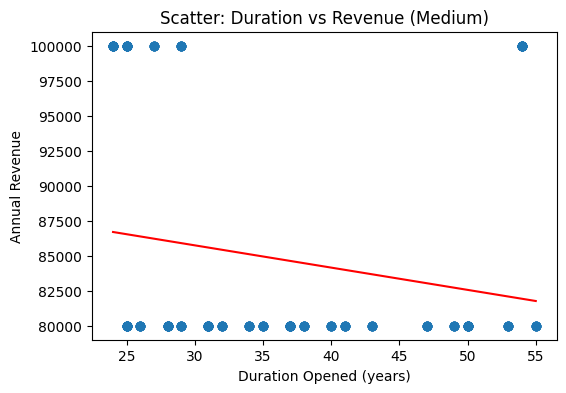

Correlation between Duration Opened and Revenue for Medium stores: -0.18651493098842548


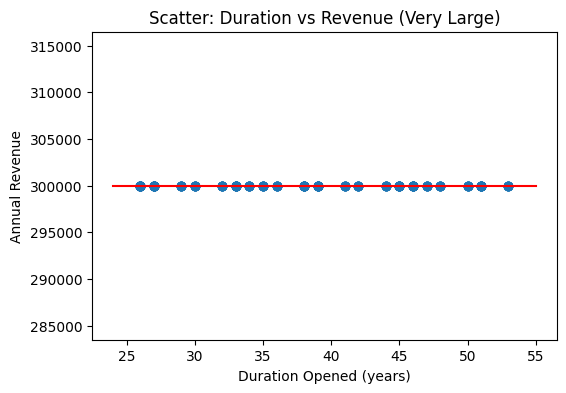

Correlation between Duration Opened and Revenue for Very Large stores: nan


/Users/kristina/.pyenv/versions/3.9.18/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/kristina/.pyenv/versions/3.9.18/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


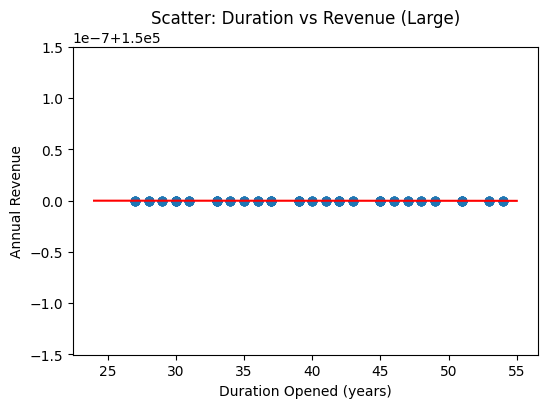

Correlation between Duration Opened and Revenue for Large stores: nan


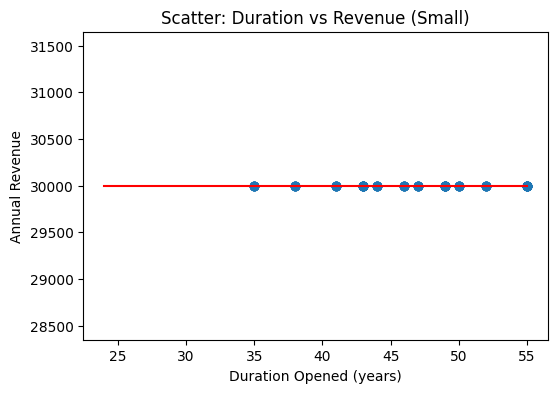

Correlation between Duration Opened and Revenue for Small stores: nan


In [75]:
# i devided data by size of store(SquareFeet collumn) and want to see correlation between Duration opened and AnnualRevenue for each size
bins = [0, 15000, 30000, 50000, 80000]
labels = ['Small', 'Medium', 'Large', 'Very Large']
df['StoreSizeCategory'] = pd.cut(df['SquareFeet'], bins=bins, labels=labels)
df['StoreSizeCategory'].value_counts()

categories = df['StoreSizeCategory'].unique()

for cat in categories:
    cat_data = df[df['StoreSizeCategory'] == cat]

    plt.figure(figsize=(6,4))
    plt.scatter(cat_data['Duration_opened_in_years'], cat_data['AnnualRevenue'])
    plt.title(f'Scatter: Duration vs Revenue ({cat})')
    plt.xlabel('Duration Opened (years)')
    plt.ylabel('Annual Revenue')
    plt.trendline = np.polyfit(cat_data['Duration_opened_in_years'], cat_data['AnnualRevenue'], 1)
    
    plt.plot(specialty_data['Duration_opened_in_years'], np.polyval(plt.trendline, specialty_data['Duration_opened_in_years']), color='red')
    plt.show()
    correlation = cat_data['Duration_opened_in_years'].corr(cat_data['AnnualRevenue'])
    print(f'Correlation between Duration Opened and Revenue for {cat} stores: {correlation}')


In [76]:
df['StoreSizeCategory'].value_counts()

StoreSizeCategory
Medium        218
Very Large    204
Large         192
Small          87
Name: count, dtype: int64

In [77]:
#check how many unique values in Duration_opened_in_years and AnnualRevenue for Very Large, large, medium and small stores
for category in ['Very Large', 'Large', 'Medium', 'Small']:
    duration_unique = df[df['StoreSizeCategory'] == category]['Duration_opened_in_years'].nunique()
    revenue_unique = df[df['StoreSizeCategory'] == category]['AnnualRevenue'].nunique()

    print(f"Category: {category}")
    print(f"  Unique 'Duration_opened_in_years' values: {duration_unique}")
    print(f"  Unique 'AnnualRevenue' values: {revenue_unique}")
    print("-" * 50)


Category: Very Large
  Unique 'Duration_opened_in_years' values: 21
  Unique 'AnnualRevenue' values: 1
--------------------------------------------------
Category: Large
  Unique 'Duration_opened_in_years' values: 23
  Unique 'AnnualRevenue' values: 1
--------------------------------------------------
Category: Medium
  Unique 'Duration_opened_in_years' values: 21
  Unique 'AnnualRevenue' values: 2
--------------------------------------------------
Category: Small
  Unique 'Duration_opened_in_years' values: 11
  Unique 'AnnualRevenue' values: 1
--------------------------------------------------


# Analysis of the Relationship Between Store Trading Duration and Revenue

## 1. Overall Analysis for All Stores
- Calculated the correlation between **Duration Opened** (years a store has been operating) and **AnnualRevenue**: -0.1336

- The value is close to 0 → indicating **little to no linear relationship**.
- Visualized with a scatter plot including a trend line, which shows a wide spread of points without a clear trend.



## 2. Analysis by Store Specialty
- Stores were grouped by `Specialty`: `['Touring', 'Mountain', 'Road']`.
- Correlations within each specialty:

Touring: -0.0728
Mountain: -0.0834
Road: -0.2035


- Correlations are low → **no significant relationship** between store age and revenue within these groups.

---

## 3. Analysis by Store Size (SquareFeet)
- Stores were divided into categories:

| StoreSizeCategory | Count |
|------------------|-------|
| Medium           | 218   |
| Very Large       | 204   |
| Large            | 192   |
| Small            | 87    |

- Correlation between **Duration Opened** and **AnnualRevenue** for Medium stores: -0.1865


- Correlations for other size categories (`Very Large`, `Large`, `Small`) are `NaN` because **AnnualRevenue is constant within these categories**, making correlation undefined.

---

**Check of Unique Values per Size Category**

| Category    | Unique Duration Values | Unique Revenue Values |
|------------|-----------------------|---------------------|
| Very Large | 21                    | 1                   |
| Large      | 23                    | 1                   |
| Medium     | 21                    | 2                   |
| Small      | 11                    | 1                   |

- Explains why correlation cannot be computed for most categories: **no variation in revenue**.

---

## Conclusion

- Overall, and within specialties or store size categories, **there is no meaningful linear relationship between the duration a store has been open and its revenue**.  
- Scatter plots and correlation calculations confirm this lack of dependence.  
- Most store size categories have **only one revenue value** because the data is **synthetic**, so correlation cannot be calculated.


